# Loan Application Status Prediction

This loanset includes details of applicants who have applied for loan. The loanset includes details like credit history, loan amount, their income, dependents etc.

In [1]:
import pandas as pd # use to load the loanset
import numpy as np # use to help in array and matrix
 
# use to avoid unnecessary informations
import warnings
warnings.filterwarnings('ignore')

## loading loanset

In [2]:
loan=pd.read_csv("loan_pred.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

## preprocessing

### duplicates

In [4]:
duplicated = loan.duplicated().sum()
total_lines = loan.shape[0]
percentage = (duplicated/total_lines) * 100
print("Total of duplicates:",duplicated)
print("total rows:",total_lines)
print("percentage of duplicates:",percentage)


Total of duplicates: 0
total rows: 614
percentage of duplicates: 0.0


no duplicates in dataset

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are null values in dataset

In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan['Total_Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']

adding new column total income having combination of applicantincome and coapplicantincome to show the total income of the applicant

##### dropping column

In [9]:
loan=loan.drop('Loan_ID',axis=1)

dropping unnecessary column

In [10]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

there is no imbalance class in target column

In [11]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
# check for categorical attributes
cat_col=[]
num_col=[]
for i in loan.dtypes.index:
    if loan.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('Categorical Columns:\n\t\t',cat_col)
print('\n\nNumeric Columns:\n\t\t',num_col)

Categorical Columns:
		 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numeric Columns:
		 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']


# EDA

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

<Figure size 216x216 with 0 Axes>

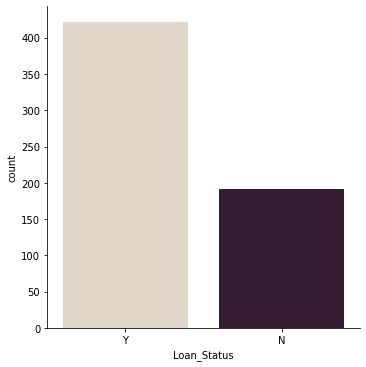

In [14]:
fig = plt.figure(figsize =(3,3))
sns.catplot(x="Loan_Status", kind="count", palette="ch:.25", data=loan)
plt.show()

<Figure size 288x288 with 0 Axes>

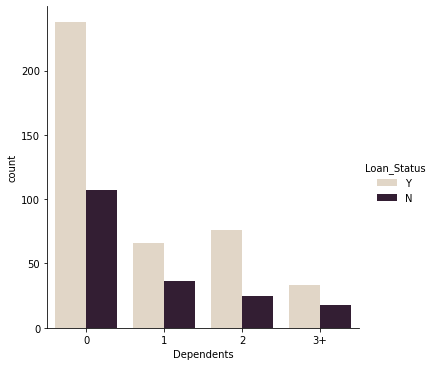

In [15]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Dependents",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

dependent 0 has maximum chances of yes and no

<Figure size 288x288 with 0 Axes>

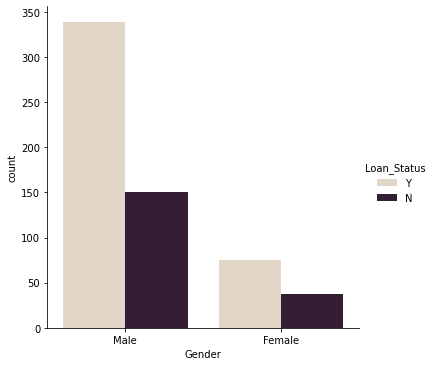

In [16]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Gender",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

males have maximun chances of loan status rather than females

<Figure size 288x288 with 0 Axes>

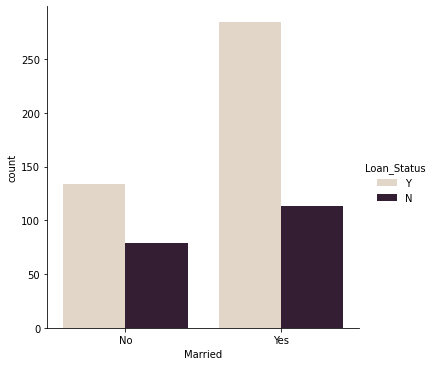

In [17]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Married",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

chances of getting loan in married are higher than unmarried

<Figure size 288x288 with 0 Axes>

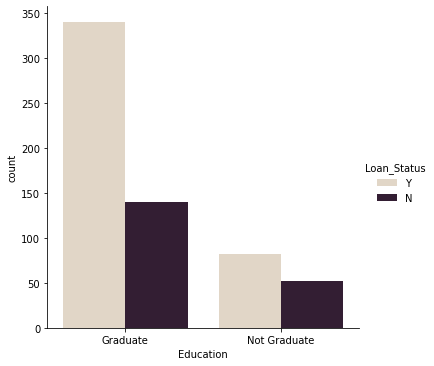

In [18]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Education",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

chances of getting loan for graduate are higher not graduate

<Figure size 288x288 with 0 Axes>

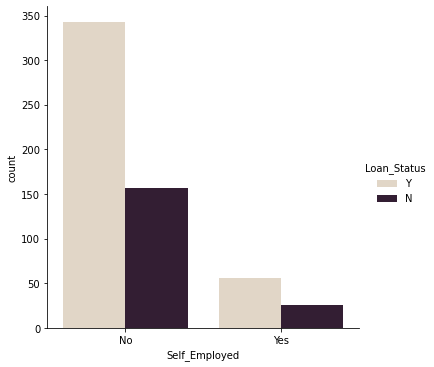

In [19]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Self_Employed",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

chances of not getting loan who are self employed

<Figure size 288x288 with 0 Axes>

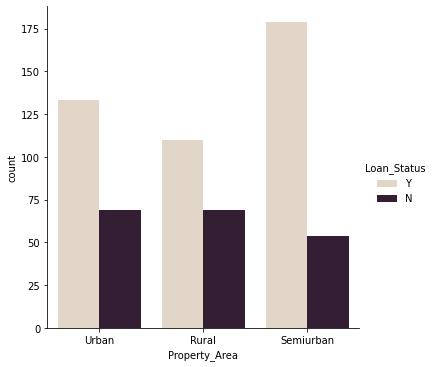

In [20]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="Property_Area",hue='Loan_Status' ,kind="count", palette="ch:.25", data=loan)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

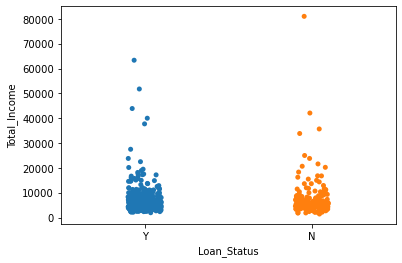

In [21]:
sns.stripplot(y='Total_Income',x='Loan_Status',data=loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

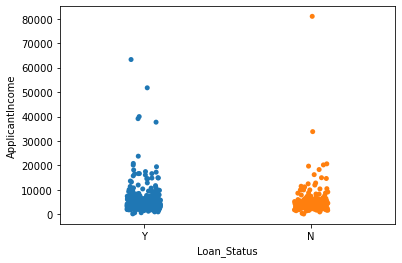

In [22]:
sns.stripplot(y='ApplicantIncome',x='Loan_Status',data=loan)

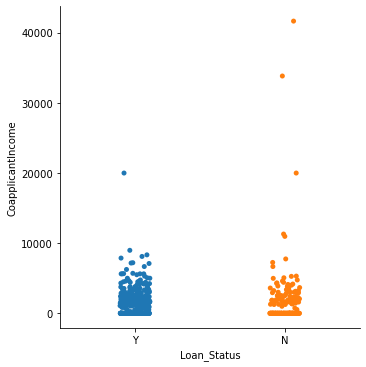

In [23]:
sns.catplot(y='CoapplicantIncome',x='Loan_Status',data=loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

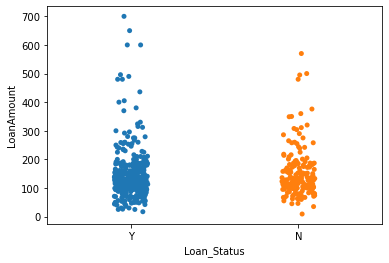

In [24]:
sns.stripplot(y='LoanAmount',x='Loan_Status',data=loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

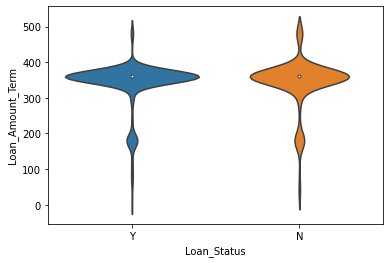

In [25]:
sns.violinplot(y='Loan_Amount_Term',x='Loan_Status',data=loan)

loan amount term is not showing any relation with loan status yes or no

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

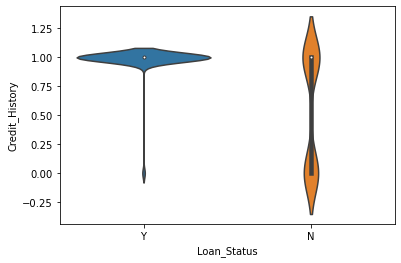

In [26]:
sns.violinplot(y='Credit_History',x='Loan_Status',data=loan)

credit history must be high for loan approval

### heatmap correlation

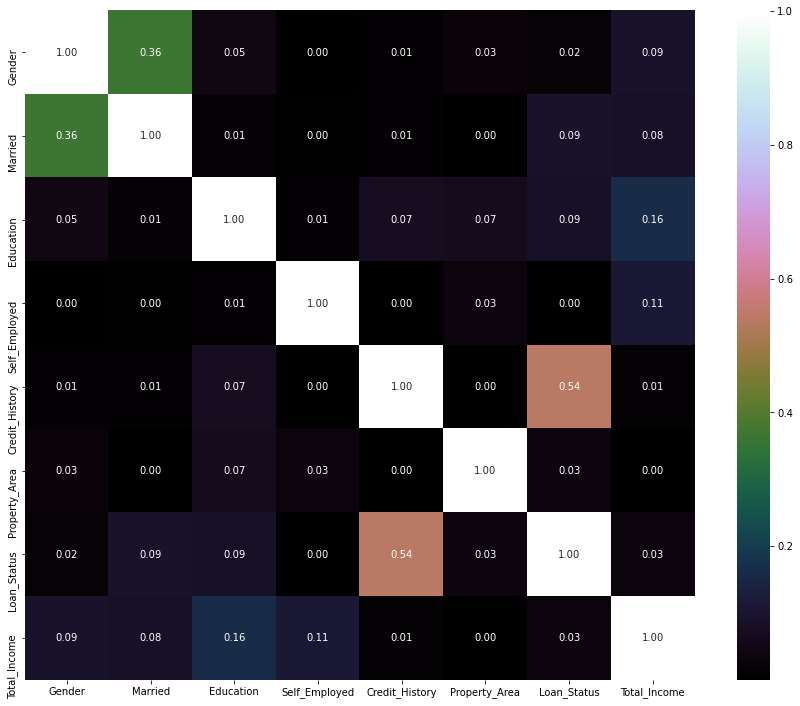

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(loan.corr().abs(),square=True,fmt='.2f',cbar=True,cbar_kws={'shrink':.82},annot=True,annot_kws={'size':10},cmap='cubehelix')
plt.show()

showing that there is no relation between loan_status and self_employed.

#### filling nan values

In [27]:
# handling nan for numerical columns
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].median())

# handling nan values for categorical columns
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] =loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] =loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [28]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

all nan values are removed

### drop columns

In [29]:
cols=['ApplicantIncome', "LoanAmount", "Loan_Amount_Term", 'CoapplicantIncome', 'Dependents']
loan=loan.drop(columns=cols, axis=1)
loan

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,Graduate,No,1.0,Urban,Y,5849.0
1,Male,Yes,Graduate,No,1.0,Rural,N,6091.0
2,Male,Yes,Graduate,Yes,1.0,Urban,Y,3000.0
3,Male,Yes,Not Graduate,No,1.0,Urban,Y,4941.0
4,Male,No,Graduate,No,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,1.0,Rural,Y,2900.0
610,Male,Yes,Graduate,No,1.0,Rural,Y,4106.0
611,Male,Yes,Graduate,No,1.0,Urban,Y,8312.0
612,Male,Yes,Graduate,No,1.0,Urban,Y,7583.0


dropping unnecessary columns

### label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le=LabelEncoder()
for i in cols:
    loan[i]=le.fit_transform(loan[i])
loan

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,1.0,2,1,5849.0
1,1,1,0,0,1.0,0,0,6091.0
2,1,1,0,1,1.0,2,1,3000.0
3,1,1,1,0,1.0,2,1,4941.0
4,1,0,0,0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...
609,0,0,0,0,1.0,0,1,2900.0
610,1,1,0,0,1.0,0,1,4106.0
611,1,1,0,0,1.0,2,1,8312.0
612,1,1,0,0,1.0,2,1,7583.0


### visualization of skewness

In [31]:
loan.skew()

Gender           -1.648795
Married          -0.644850
Education         1.367622
Self_Employed     2.159796
Credit_History   -2.021971
Property_Area    -0.066196
Loan_Status      -0.809998
Total_Income      5.633449
dtype: float64

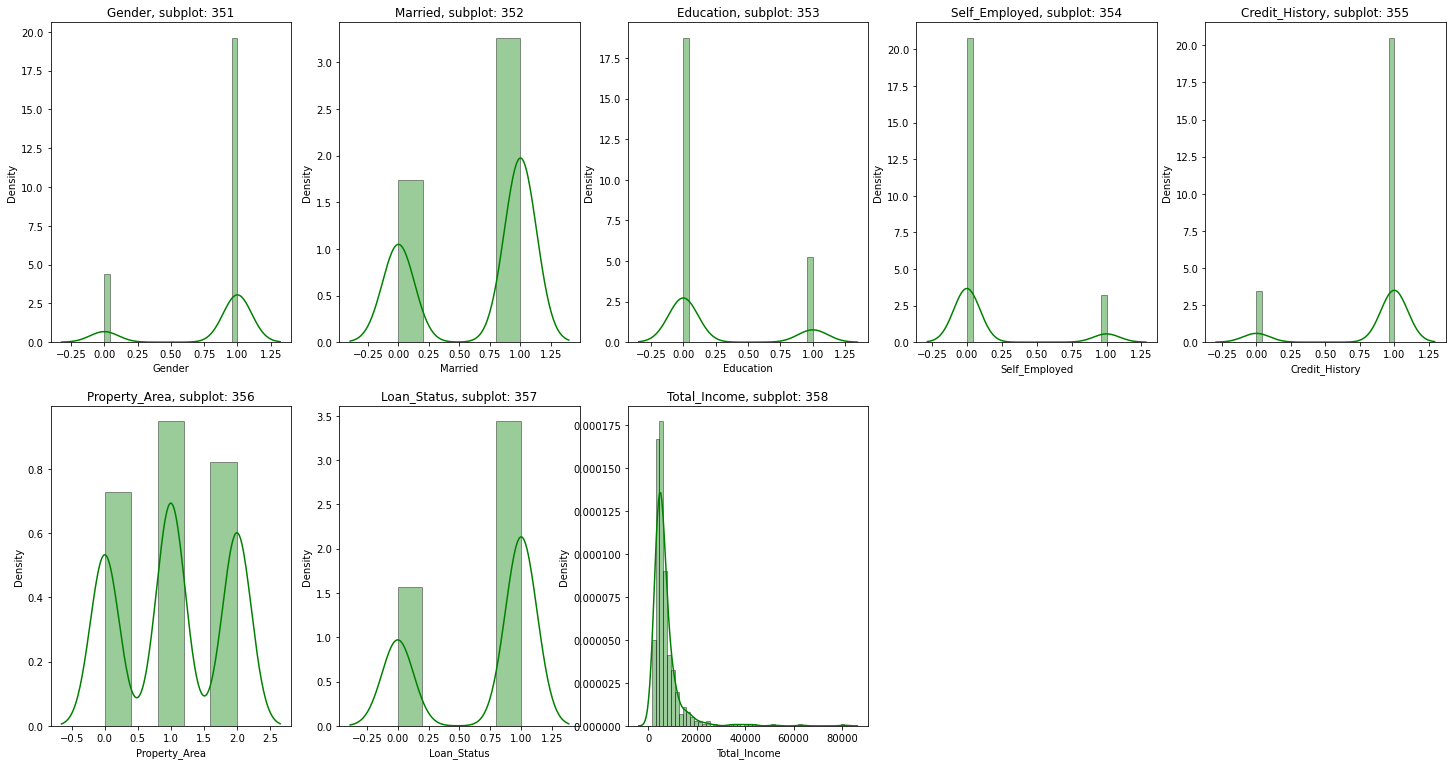

In [32]:
fig = plt.figure(figsize=(25,20))
c=1
for i in loan:
    plt.subplot(3,5,c)
    plt.title('{}, subplot: {}{}{}'.format(i,3,5, c))
    plt.xlabel(i)
    sns.distplot(loan[i],color='green',hist_kws={"edgecolor": 'black'})
    c = c + 1
plt.show()


### splitting data

In [33]:
x= loan.drop(['Loan_Status','Total_Income'],axis=1)
y=loan['Loan_Status']

### importing model 

In [34]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

###### finding best random state 

In [35]:
maxx=0
model=LogisticRegression()
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxx:
        maxx=accu
        random_state_=i
print('\nmax random state:',random_state_)


max random state: 63


### train test split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=random_state_)

######  prediction with cross validation

In [37]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
scr_=cross_val_score(lr,x,y,cv=10)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:87.01%

cross validation score:80.96%

auc roc score:78.26%


classification report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154


confusioon matrix:

[[ 26  20]
 [  0 108]]


In [38]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
scr_=cross_val_score(dtc,x,y,cv=10)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Decision Tree Classifier------------------

accuracy score:79.22%

cross validation score:78.03%

auc roc score:73.33%


classification report:

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        46
           1       0.83      0.88      0.86       108

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


confusioon matrix:

[[27 19]
 [13 95]]


In [39]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
scr_=cross_val_score(knc,x,y,cv=10)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------KNeighbors Classifier------------------

accuracy score:83.12%

cross validation score:78.19%

auc roc score:75.48%


classification report:

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        46
           1       0.84      0.94      0.89       108

    accuracy                           0.83       154
   macro avg       0.82      0.75      0.78       154
weighted avg       0.83      0.83      0.82       154


confusioon matrix:

[[ 26  20]
 [  6 102]]


In [40]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
scr_=cross_val_score(svc,x,y,cv=10)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Support Vector Classifier------------------

accuracy score:87.01%

cross validation score:80.96%

auc roc score:78.26%


classification report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154


confusioon matrix:

[[ 26  20]
 [  0 108]]


In [41]:
# GaussianNB Classifier model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
scr_=cross_val_score(gnb,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:87.01%

cross validation score:80.96%

auc roc score:78.26%


classification report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154


confusioon matrix:

[[ 26  20]
 [  0 108]]


In [42]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
scr_=cross_val_score(rfc,x,y,cv=10)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------RandomForest Classifier------------------

accuracy score:81.17%

cross validation score:78.68%

auc roc score:74.72%


classification report:

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        46
           1       0.84      0.91      0.87       108

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154


confusioon matrix:

[[27 19]
 [10 98]]


In [43]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
scr_=cross_val_score(abc,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:86.36%

cross validation score:80.96%

auc roc score:77.80%


classification report:

              precision    recall  f1-score   support

           0       0.96      0.57      0.71        46
           1       0.84      0.99      0.91       108

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.88      0.86      0.85       154


confusioon matrix:

[[ 26  20]
 [  1 107]]


In [44]:
# XGB Classifier model
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
scr_=cross_val_score(xgb,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:79.87%

cross validation score:78.35%

auc roc score:73.17%


classification report:

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        46
           1       0.83      0.90      0.86       108

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154


confusioon matrix:

[[26 20]
 [11 97]]


In [45]:
# GradientBoosting Classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
scr_=cross_val_score(gbc,x,y,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:80.52%

cross validation score:79.82%

auc roc score:74.26%


classification report:

              precision    recall  f1-score   support

           0       0.71      0.59      0.64        46
           1       0.84      0.90      0.87       108

    accuracy                           0.81       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154


confusioon matrix:

[[27 19]
 [11 97]]


### plotting auc roc curve 

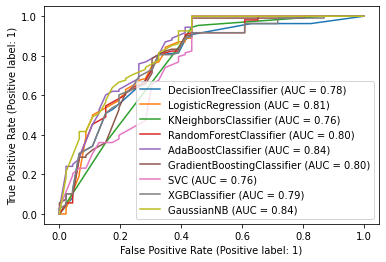

In [46]:
disp=plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

## HyperParameter Tuning

###### on the basis of best least difference best model is  GradientBoosting Classifier

In [47]:
from sklearn.model_selection import GridSearchCV

parameters={ 'n_estimators' : [20,40,60,80,100],
               'criterion' : ['friedman_mse','mse','mae'],
               'learning_rate' : [0.001,0.0001,0.01,1],
           'loss':['deviance','exponential']}
clf=GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

gbc_new=clf.best_estimator_
gbc_new.fit(x_train,y_train)
pred=gbc_new.predict(x_test)
scr_=cross_val_score(gbc_new,x,y,cv=10)
print('-------------------------- GradientBoosting Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

best parameters {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 60}
-------------------------- GradientBoosting Classifier------------------

accuracy score:87.01%

cross validation score:80.96%

auc roc score:78.26%


classification report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154


confusioon matrix:

[[ 26  20]
 [  0 108]]


### plotting best model and model

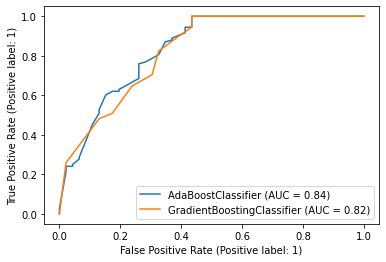

In [48]:
disp=plot_roc_curve(abc,x_test,y_test)
plot_roc_curve(gbc_new,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plt.legend(prop={'size':10},loc='lower right')
plt.show()

### plotting for best model after hyperparameter tuning

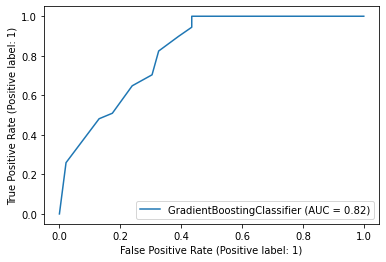

In [49]:
disp=plot_roc_curve(gbc_new,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [50]:
import pickle
filename='loan_predict.pkl'
pickle.dump(gbc_new,open(filename,'wb'))